<a href="https://colab.research.google.com/github/daksha200/office-assignmemts/blob/testrepo/ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airline = pd.read_csv("/content/sample_data/airline_passengers.csv")

In [4]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
df_airline.dropna(axis=0,inplace=True)

In [8]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
df_airline.set_index('Month',inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

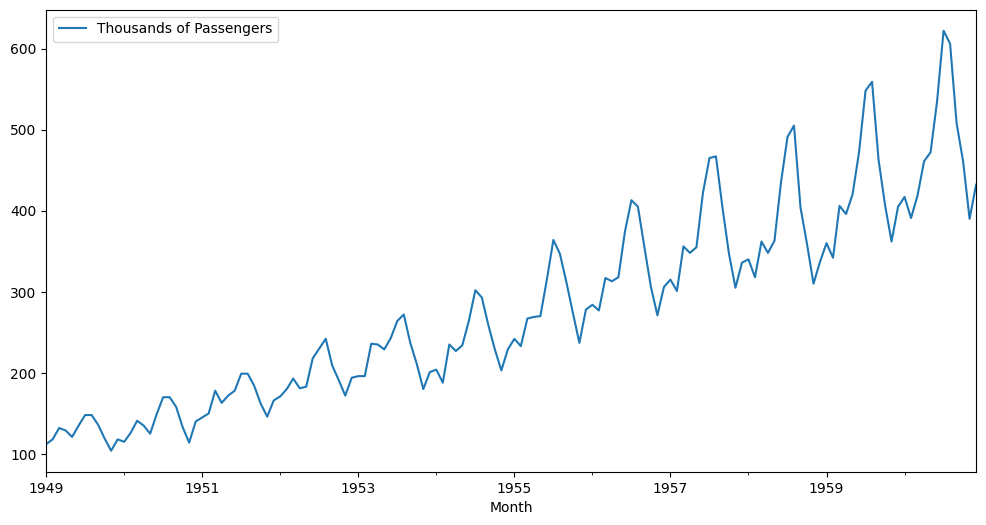

In [15]:
df_airline.plot(figsize=(12,6))

It is a seasonal data. Now applying Dickey Fuller Test for Null Hypothesis . if rejected it is a stationary data . A stationary time series data is one whose properties do not depend on the time, That is why time series with trends, or with seasonality, are not stationary.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_test(df_airline["Thousands of Passengers"])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Using techniques for differencing (simple moving average)

In [19]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
df_airline['Passengers Second Difference'] = df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [23]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


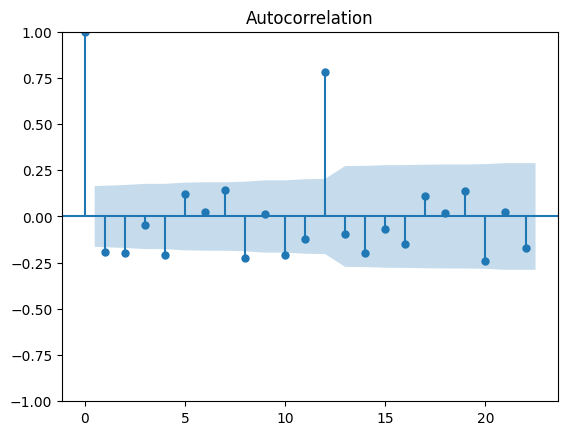

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

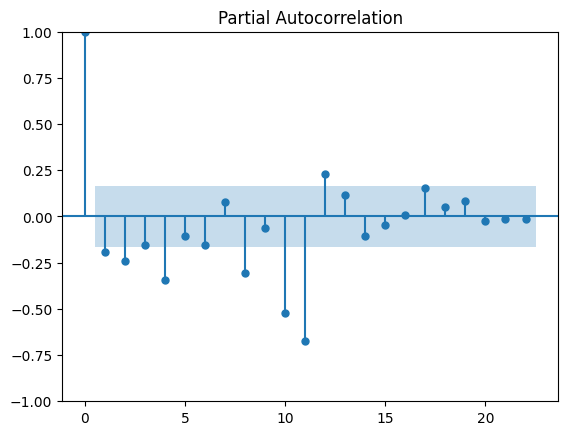

In [25]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [26]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [27]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [28]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]


##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


Now Predicting using various models to get the highest prediction score

ARIMA Model

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [56]:

model_ARIMA=ARIMA(test_data['Thousands of Passengers'],order=(0,2,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   60
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -312.766
Date:                     Sun, 21 Apr 2024   AIC                            627.531
Time:                             13:00:23   BIC                            629.592
Sample:                         01-01-1956   HQIC                           628.334
                              - 12-01-1960                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2827.9692    659.012      4.291      0.000    1536.329    4119.609
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.21   Prob(JB):                         0.50
Heteroskedasticity (H):               1.91   Skew:                            -0.11
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Predicted_SARIMA
Month,,,,
1956-01-01,284.0,6.0,-35.0,NaN
1956-02-01,277.0,-7.0,-13.0,NaN
1956-03-01,317.0,40.0,47.0,NaN
1956-04-01,313.0,-4.0,-44.0,NaN
1956-05-01,318.0,5.0,9.0,NaN
1956-06-01,374.0,56.0,51.0,NaN
1956-07-01,413.0,39.0,-17.0,403.397562
1956-08-01,405.0,-8.0,-47.0,385.070585
1956-09-01,355.0,-50.0,-42.0,349.445081


In [61]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [62]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [63]:
pred

1956-01-01      0.000000
1956-02-01    426.200502
1956-03-01    270.000000
1956-04-01    357.000000
1956-05-01    309.000000
1956-06-01    323.000000
1956-07-01    430.000000
1956-08-01    452.000000
1956-09-01    397.000000
1956-10-01    305.000000
1956-11-01    257.000000
1956-12-01    236.000000
1957-01-01    341.000000
1957-02-01    324.000000
1957-03-01    287.000000
1957-04-01    411.000000
1957-05-01    340.000000
1957-06-01    362.000000
1957-07-01    489.000000
1957-08-01    508.000000
1957-09-01    469.000000
1957-10-01    341.000000
1957-11-01    290.000000
1957-12-01    263.000000
1958-01-01    367.000000
1958-02-01    344.000000
1958-03-01    296.000000
1958-04-01    406.000000
1958-05-01    334.000000
1958-06-01    378.000000
1958-07-01    507.000000
1958-08-01    547.000000
1958-09-01    519.000000
1958-10-01    303.000000
1958-11-01    314.000000
1958-12-01    261.000000
1959-01-01    364.000000
1959-02-01    383.000000
1959-03-01    324.000000
1959-04-01    470.000000


In [64]:
residuals

Month
1956-01-01    284.000000
1956-02-01   -149.200502
1956-03-01     47.000000
1956-04-01    -44.000000
1956-05-01      9.000000
1956-06-01     51.000000
1956-07-01    -17.000000
1956-08-01    -47.000000
1956-09-01    -42.000000
1956-10-01      1.000000
1956-11-01     14.000000
1956-12-01     70.000000
1957-01-01    -26.000000
1957-02-01    -23.000000
1957-03-01     69.000000
1957-04-01    -63.000000
1957-05-01     15.000000
1957-06-01     60.000000
1957-07-01    -24.000000
1957-08-01    -41.000000
1957-09-01    -65.000000
1957-10-01      6.000000
1957-11-01     15.000000
1957-12-01     73.000000
1958-01-01    -27.000000
1958-02-01    -26.000000
1958-03-01     66.000000
1958-04-01    -58.000000
1958-05-01     29.000000
1958-06-01     57.000000
1958-07-01    -16.000000
1958-08-01    -42.000000
1958-09-01   -115.000000
1958-10-01     56.000000
1958-11-01     -4.000000
1958-12-01     76.000000
1959-01-01     -4.000000
1959-02-01    -41.000000
1959-03-01     82.000000
1959-04-01    -74.0



1.   kde = kernel density plot
2.   resid = observed value - predicted value



<Axes: ylabel='Density'>

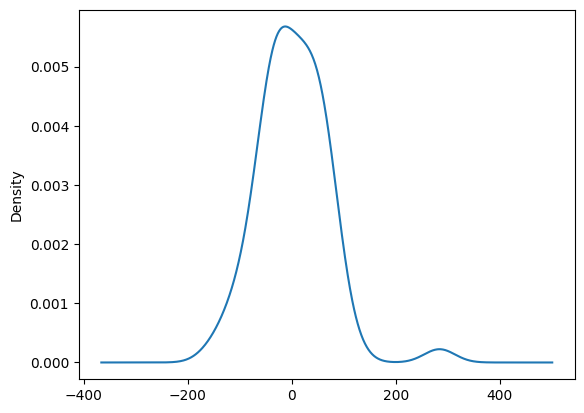

In [65]:
model_Arima_fit.resid.plot(kind='kde')

In [70]:
pred = test_data['Predicted_ARIMA']

<Axes: xlabel='Month'>

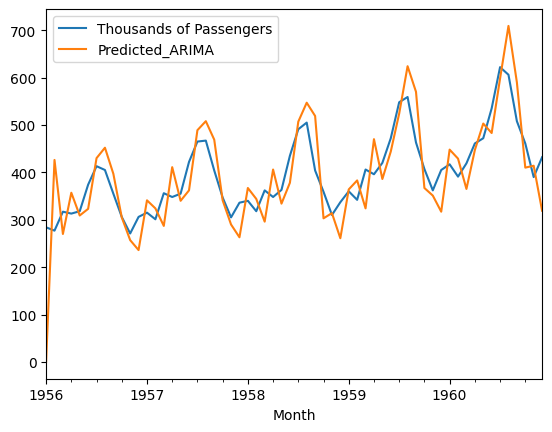

In [67]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [40]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sun, 21 Apr 2024   AIC                            548.481
Time:                                     12:55:27   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0
1960-11-01,390.0,-71.0,-24.0
1960-12-01,432.0,42.0,113.0


In [44]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [45]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

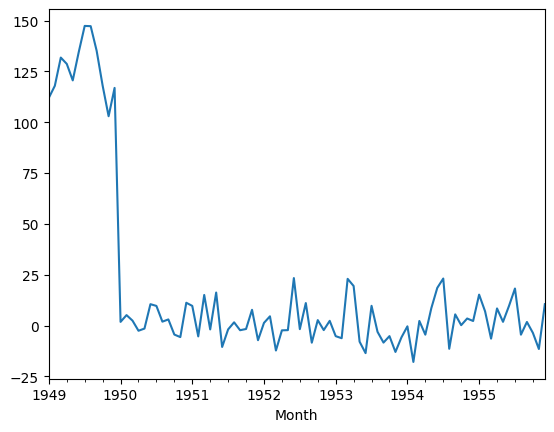

In [46]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

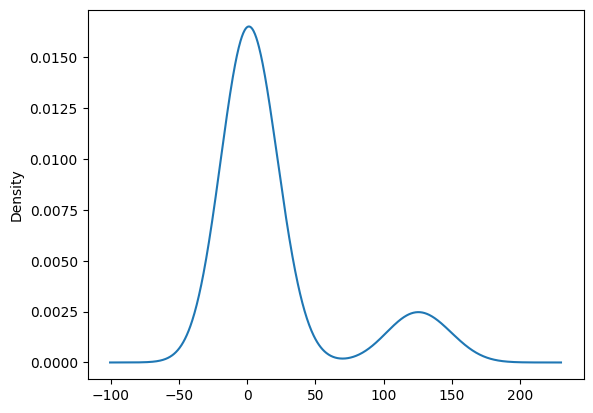

In [47]:
model_SARIMA_fit.resid.plot(kind='kde')

In [48]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-48-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [49]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Predicted_SARIMA
Month,,,,
1956-01-01,284.0,6.0,-35.0,NaN
1956-02-01,277.0,-7.0,-13.0,NaN
1956-03-01,317.0,40.0,47.0,NaN
1956-04-01,313.0,-4.0,-44.0,NaN
1956-05-01,318.0,5.0,9.0,NaN
1956-06-01,374.0,56.0,51.0,NaN
1956-07-01,413.0,39.0,-17.0,403.397562
1956-08-01,405.0,-8.0,-47.0,385.070585
1956-09-01,355.0,-50.0,-42.0,349.445081


Plot for the comparison of ARIMA and SARIMA

<Axes: xlabel='Month'>

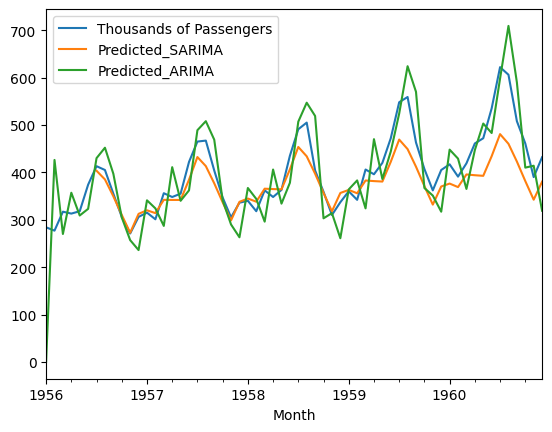

In [69]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()